In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt
%matplotlib inline
%load_ext watermark
%watermark

2022-02-16T11:51:55+01:00

CPython 3.6.7
IPython 6.4.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-167-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# 1. Trapped ions physics

In 1D the motion equation of a trapped ion $i$, in an RF field, with friction and Coulomb interaction is as follows :

$m\ddot y_i = \frac{2q_eU_{RF}}{r_0^2}\cos\Omega t ~y_i + q_e^2k_C\sum_{j=1}^N \frac{y_i-y_j}{d_{ij}^3} - \gamma\dot y_i$

Numerically solve this equation is equivalent to obtain the set of variables $y_i$, $v_i=\frac{\mathrm{d}y_i}{\mathrm{d}t}$ and $a_i = \frac{\mathrm{d^2}y_i}{\mathrm{d}t^2}$ that fulfill this equation. Several methods can be used. In our Fortran code, when there are no friction velocity-Verlet method (VV) is used, but when friction is implemented another method must be used. Blümel *et al* use Runge-Kutta fourth order method (RK4). This document deals with both VV and RK4.

For RK4 it is convenient to write the second order differential equation as a system of two first order differential equations

$\dot y_i = v_i \\ \dot v_i = a_i = \frac{2q_eU_{RF}}{r_0^2}\cos\Omega t ~y_i + q_e^2k_C\sum_{j=1}^N \frac{y_i-y_j}{d_{ij}^3} - \gamma v_i$

It may seems that this decomposition is artificial, expecially because there is no analytical expression for the velocity $v_i$. Nevertheless this is no problem because the actual value for the velocity $v_i$ is know at the beginning of each step of RK4 algorithm.

# 2. Simulation of a trapped ion

Done with ForTran ```Runge_Kutta_Nions.F90``` as in this [Stack exchange](https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od) (but I have seen this elsewhere)

In [56]:
# definition of physical variables
C_e = 1.602e-19
m_Ca = 40.078*1.66054e-27 # mass of trapped ion
r0 = 2.865e-3/1.14511  # trap internal radius 2.5e-3 
Omega = 2*np.pi*2e6  # RF field angular frequency
Urf = 40       # RF voltage amplitude

nt = 100
dt_rk4 = 2*np.pi/(nt*Omega)

# Loading data from Fortran version
```gfortran -o3 .\Runge_Kutta_ions.f90 -o a.exe; .\a.exe```

In [161]:
with open('/home/adrian/RemoteFS/Rivendel/Simulations/20220208/xyz_1ion.dat') as f:
    all_data = np.loadtxt(f,unpack=True) 
    t_For = all_data[0]
    r_For = all_data[1:4]
    v_For = all_data[4:7]
    a_For = all_data[7:10]

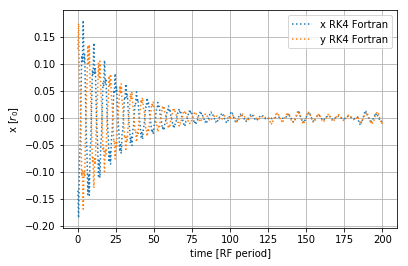

In [162]:
plt.figure('First ion dynamics',clear='True')
ax = plt.subplot(111)

ax.plot(t_For/(nt*dt_rk4),np.array(r_For[0])/r0,ls=':',label='x RK4 Fortran')
ax.plot(t_For/(nt*dt_rk4),np.array(r_For[1])/r0,ls=':',label='y RK4 Fortran')
# ax.plot(t_For/(nt*dt_rk4),np.array(r_For[2])/r0,ls=':',label='z RK4 Fortran')

# ax.plot(t_For/(nt*dt_rk4),v_For[0],ls=':',label='v_x RK4 Fortran')
# ax.plot(t_For/(nt*dt_rk4),a_For[0],ls=':',label='a_x RK4 Fortran')

ax.set_xlabel('time [RF period]')
ax.set_ylabel('x [$r_0$]')
# ax.set_ylim(-5,1e5)
ax.grid()
ax.legend()